In [154]:
import pandas as pd
import numpy as np

### Read .csv file and conver the data type for times.

In [109]:
t = pd.read_csv('flights.csv', header="infer", sep=',', dtype={'SCHEDULED_DEPARTURE': str, "DEPARTURE_TIME": str, "SCHEDULED_ARRIVAL" : str, "ARRIVAL_TIME" : str})

### Only keep the "HOUR" for SCHEDULED_DEPARTURE & SCHEDULED_ARRIVAL and rename them.

In [110]:
t['SCHEDULED_DEPARTURE'] = t['SCHEDULED_DEPARTURE'].apply(lambda x:x[:2])
t['SCHEDULED_ARRIVAL'] = t['SCHEDULED_ARRIVAL'].apply(lambda x:x[:2])
t = t.rename(columns={"SCHEDULED_DEPARTURE":"SCHEDULED_DEPARTURE_HOUR", "SCHEDULED_ARRIVAL": "SCHEDULED_ARRIVAL_HOUR" })

In [111]:
t.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00,2354,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00,0002,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,00,0018,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00,0015,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00,0024,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
t.columns

Index([u'YEAR', u'MONTH', u'DAY', u'DAY_OF_WEEK', u'AIRLINE', u'FLIGHT_NUMBER',
       u'TAIL_NUMBER', u'ORIGIN_AIRPORT', u'DESTINATION_AIRPORT',
       u'SCHEDULED_DEPARTURE_HOUR', u'DEPARTURE_TIME', u'DEPARTURE_DELAY',
       u'TAXI_OUT', u'WHEELS_OFF', u'SCHEDULED_TIME', u'ELAPSED_TIME',
       u'AIR_TIME', u'DISTANCE', u'WHEELS_ON', u'TAXI_IN',
       u'SCHEDULED_ARRIVAL_HOUR', u'ARRIVAL_TIME', u'ARRIVAL_DELAY',
       u'DIVERTED', u'CANCELLED', u'CANCELLATION_REASON', u'AIR_SYSTEM_DELAY',
       u'SECURITY_DELAY', u'AIRLINE_DELAY', u'LATE_AIRCRAFT_DELAY',
       u'WEATHER_DELAY'],
      dtype='object')

'MONTH', 'DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT', 
"SCHEDULED_DEPARTURE_Hour", "DEPARTURE_DELAY_FLAG", "SCHEDULED_TIME", ("AIR_TIME"), "DISTANCE",
"SCHEDULED_ARRIVAL_Hour", "ARRIVAL_DELAY_FLAG"


### Drop useless columns

In [113]:
t1 = t.drop(["YEAR", "DAY","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME",
             "TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME", "WHEELS_ON", "TAXI_IN", "ARRIVAL_TIME",
             'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'], axis=1) 
t1.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'AIRLINE', u'ORIGIN_AIRPORT',
       u'DESTINATION_AIRPORT', u'SCHEDULED_DEPARTURE_HOUR', u'DEPARTURE_DELAY',
       u'SCHEDULED_TIME', u'DISTANCE', u'SCHEDULED_ARRIVAL_HOUR',
       u'ARRIVAL_DELAY'],
      dtype='object')

In [114]:
t1.shape

(5819079, 11)

In [115]:
t1.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY
0,1,4,AS,ANC,SEA,00,-11.0,205.0,1448,04,-22.0
1,1,4,AA,LAX,PBI,00,-8.0,280.0,2330,07,-9.0
2,1,4,US,SFO,CLT,00,-2.0,286.0,2296,08,5.0
3,1,4,AA,LAX,MIA,00,-5.0,285.0,2342,08,-9.0
4,1,4,AS,SEA,ANC,00,-1.0,235.0,1448,03,-21.0


### Generate the Delay Flag column for both Departure & Arrival

In [116]:
flight1 = t1
flight1.loc[flight1['ARRIVAL_DELAY'] > 0.0, 'ARRIVAL_DELAY_FLAG'] = 1
flight1.loc[flight1['ARRIVAL_DELAY'] <= 0.0, 'ARRIVAL_DELAY_FLAG'] = 0
flight1.loc[flight1['DEPARTURE_DELAY'] > 0.0, 'DEPARTURE_DELAY_FLAG'] = 1
flight1.loc[flight1['DEPARTURE_DELAY'] <= 0.0, 'DEPARTURE_DELAY_FLAG'] = 0
flight1.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'AIRLINE', u'ORIGIN_AIRPORT',
       u'DESTINATION_AIRPORT', u'SCHEDULED_DEPARTURE_HOUR', u'DEPARTURE_DELAY',
       u'SCHEDULED_TIME', u'DISTANCE', u'SCHEDULED_ARRIVAL_HOUR',
       u'ARRIVAL_DELAY', u'ARRIVAL_DELAY_FLAG', u'DEPARTURE_DELAY_FLAG'],
      dtype='object')

In [117]:
flight1 = flight1.drop(['ARRIVAL_DELAY', 'DEPARTURE_DELAY'],axis = 1)
flight1.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG
0,1,4,AS,ANC,SEA,00,205.0,1448,04,0.0,0.0
1,1,4,AA,LAX,PBI,00,280.0,2330,07,0.0,0.0
2,1,4,US,SFO,CLT,00,286.0,2296,08,1.0,0.0
3,1,4,AA,LAX,MIA,00,285.0,2342,08,0.0,0.0
4,1,4,AS,SEA,ANC,00,235.0,1448,03,0.0,0.0


In [118]:
flight1.shape

(5819079, 11)

In [119]:
#flight1["ORIGIN_AIRPORT"].unique()

In [120]:
a = pd.read_csv('airports.csv', header="infer", sep=',')
a.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [121]:
a = a.rename(columns={"IATA_CODE":"ORIGIN_AIRPORT"})

In [122]:
a.head()

,ORIGIN_AIRPORT,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [123]:
flight2 = flight1.merge(a,on=["ORIGIN_AIRPORT"],how="left")
flight2 = flight2.rename(columns={"CITY":"ORI_CITY", "STATE":"ORI_STATE", "COUNTRY":"ORI_COUNTRY", "LATITUDE":"ORI_LATITUDE","LONGITUDE":"ORI_LONGITUDE"})
flight2.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG,AIRPORT,ORI_CITY,ORI_STATE,ORI_COUNTRY,ORI_LATITUDE,ORI_LONGITUDE
0,1,4,AS,ANC,SEA,00,205.0,1448,04,0.0,0.0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,1,4,AA,LAX,PBI,00,280.0,2330,07,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,1,4,US,SFO,CLT,00,286.0,2296,08,1.0,0.0,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,1,4,AA,LAX,MIA,00,285.0,2342,08,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,1,4,AS,SEA,ANC,00,235.0,1448,03,0.0,0.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [124]:
b = a.rename(columns={"ORIGIN_AIRPORT":"DESTINATION_AIRPORT"})
flight3 = flight2.merge(b, on=["DESTINATION_AIRPORT"],how="left")
flight3 = flight3.rename(columns={"CITY":"DES_CITY", "STATE":"DES_STATE", "COUNTRY":"DES_COUNTRY","LATITUDE":"DES_LATITUDE","LONGITUDE":"DES_LONGITUDE"})
flight3.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG,AIRPORT_x,ORI_CITY,ORI_STATE,ORI_COUNTRY,ORI_LATITUDE,ORI_LONGITUDE,AIRPORT_y,DES_CITY,DES_STATE,DES_COUNTRY,DES_LATITUDE,DES_LONGITUDE
0,1,4,AS,ANC,SEA,00,205.0,1448,04,0.0,0.0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,1,4,AA,LAX,PBI,00,280.0,2330,07,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,1,4,US,SFO,CLT,00,286.0,2296,08,1.0,0.0,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,1,4,AA,LAX,MIA,00,285.0,2342,08,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,1,4,AS,SEA,ANC,00,235.0,1448,03,0.0,0.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [125]:
pd.options.display.max_columns = 100



In [126]:
flights = flight3.rename(columns={"AIRPORT_x":"ORI_AIRPORT","AIRPORT_y":"DES_AIRPORT"})
# flights = flights.drop(["YEAR", "FLIGHT_NUMBER", "DIVERTED", "CANCELLED", 
#                         "CANCELLATION_REASON", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", 
#                         "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY",
#                        "ORI_AIRPORT", "ORI_CITY", "DES_AIRPORT", "DES_CITY",
#                         'ORI_COUNTRY', 'DES_COUNTRY', 'TAXI_OUT','WHEELS_OFF','WHEELS_ON',
#                         'TAXI_IN','ELAPSED_TIME','TAIL_NUMBER'], axis=1)
# flights.columns

In [127]:
flights.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'AIRLINE', u'ORIGIN_AIRPORT',
       u'DESTINATION_AIRPORT', u'SCHEDULED_DEPARTURE_HOUR', u'SCHEDULED_TIME',
       u'DISTANCE', u'SCHEDULED_ARRIVAL_HOUR', u'ARRIVAL_DELAY_FLAG',
       u'DEPARTURE_DELAY_FLAG', u'ORI_AIRPORT', u'ORI_CITY', u'ORI_STATE',
       u'ORI_COUNTRY', u'ORI_LATITUDE', u'ORI_LONGITUDE', u'DES_AIRPORT',
       u'DES_CITY', u'DES_STATE', u'DES_COUNTRY', u'DES_LATITUDE',
       u'DES_LONGITUDE'],
      dtype='object')

In [128]:
flights.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG,ORI_AIRPORT,ORI_CITY,ORI_STATE,ORI_COUNTRY,ORI_LATITUDE,ORI_LONGITUDE,DES_AIRPORT,DES_CITY,DES_STATE,DES_COUNTRY,DES_LATITUDE,DES_LONGITUDE
0,1,4,AS,ANC,SEA,00,205.0,1448,04,0.0,0.0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,1,4,AA,LAX,PBI,00,280.0,2330,07,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,1,4,US,SFO,CLT,00,286.0,2296,08,1.0,0.0,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,1,4,AA,LAX,MIA,00,285.0,2342,08,0.0,0.0,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,1,4,AS,SEA,ANC,00,235.0,1448,03,0.0,0.0,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [129]:
flights = flights.drop(["ORI_AIRPORT", "ORI_CITY", "ORI_COUNTRY", "ORI_LATITUDE", "ORI_LONGITUDE",
                       "DES_AIRPORT", "DES_CITY", "DES_COUNTRY", "DES_LATITUDE", "DES_LONGITUDE"], axis=1)

In [130]:
flights.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG,ORI_STATE,DES_STATE
0,1,4,AS,ANC,SEA,00,205.0,1448,04,0.0,0.0,AK,WA
1,1,4,AA,LAX,PBI,00,280.0,2330,07,0.0,0.0,CA,FL
2,1,4,US,SFO,CLT,00,286.0,2296,08,1.0,0.0,CA,NC
3,1,4,AA,LAX,MIA,00,285.0,2342,08,0.0,0.0,CA,FL
4,1,4,AS,SEA,ANC,00,235.0,1448,03,0.0,0.0,WA,AK


In [131]:
flights.shape

(5819079, 13)

In [132]:
#flights = flights.dropna()
#print flights.shape
print flights.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
AIRLINE                          0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
SCHEDULED_DEPARTURE_HOUR         0
SCHEDULED_TIME                   6
DISTANCE                         0
SCHEDULED_ARRIVAL_HOUR           0
ARRIVAL_DELAY_FLAG          105071
DEPARTURE_DELAY_FLAG         86153
ORI_STATE                   486165
DES_STATE                   486165
dtype: int64


In [133]:
flightNew = flights.dropna()

In [134]:
print flightNew.shape
print flightNew.isna().sum()

(5231130, 13)
MONTH                       0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE_HOUR    0
SCHEDULED_TIME              0
DISTANCE                    0
SCHEDULED_ARRIVAL_HOUR      0
ARRIVAL_DELAY_FLAG          0
DEPARTURE_DELAY_FLAG        0
ORI_STATE                   0
DES_STATE                   0
dtype: int64


In [135]:
flightNew["MONTH"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12])

In [136]:
Oct = flights.loc[flights['MONTH'] == 10]
print Oct.shape


(486165, 13)


In [137]:
print Oct.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
AIRLINE                          0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
SCHEDULED_DEPARTURE_HOUR         0
SCHEDULED_TIME                   0
DISTANCE                         0
SCHEDULED_ARRIVAL_HOUR           0
ARRIVAL_DELAY_FLAG            3287
DEPARTURE_DELAY_FLAG          2339
ORI_STATE                   486165
DES_STATE                   486165
dtype: int64


In [138]:
flightNew.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'AIRLINE', u'ORIGIN_AIRPORT',
       u'DESTINATION_AIRPORT', u'SCHEDULED_DEPARTURE_HOUR', u'SCHEDULED_TIME',
       u'DISTANCE', u'SCHEDULED_ARRIVAL_HOUR', u'ARRIVAL_DELAY_FLAG',
       u'DEPARTURE_DELAY_FLAG', u'ORI_STATE', u'DES_STATE'],
      dtype='object')

In [139]:
flightFinal = pd.get_dummies(flightNew, columns = ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "ORI_STATE", "DES_STATE"], drop_first=False)
flightFinal.shape

(5231130, 774)

In [140]:
#flightFinal.to_csv('cleanInput.csv',index=False)

In [141]:
flightSample = flightFinal.sample(n = 1000000)
flightSample.shape

(1000000, 774)

In [142]:
flightSample.to_csv('cleanInput.csv',index=False)

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

/Users/lhzst/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lhzst/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [146]:
flightSample.head()

,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_FLAG,DEPARTURE_DELAY_FLAG,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,ORIGIN_AIRPORT_ACK,ORIGIN_AIRPORT_ACT,ORIGIN_AIRPORT_ACV,ORIGIN_AIRPORT_ACY,ORIGIN_AIRPORT_ADK,ORIGIN_AIRPORT_ADQ,ORIGIN_AIRPORT_AEX,ORIGIN_AIRPORT_AGS,ORIGIN_AIRPORT_AKN,ORIGIN_AIRPORT_ALB,ORIGIN_AIRPORT_ALO,ORIGIN_AIRPORT_AMA,ORIGIN_AIRPORT_ANC,ORIGIN_AIRPORT_APN,ORIGIN_AIRPORT_ASE,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ATW,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_AVL,ORIGIN_AIRPORT_AVP,ORIGIN_AIRPORT_AZO,ORIGIN_AIRPORT_BDL,ORIGIN_AIRPORT_BET,...,DES_STATE_AZ,DES_STATE_CA,DES_STATE_CO,DES_STATE_CT,DES_STATE_DE,DES_STATE_FL,DES_STATE_GA,DES_STATE_GU,DES_STATE_HI,DES_STATE_IA,DES_STATE_ID,DES_STATE_IL,DES_STATE_IN,DES_STATE_KS,DES_STATE_KY,DES_STATE_LA,DES_STATE_MA,DES_STATE_MD,DES_STATE_ME,DES_STATE_MI,DES_STATE_MN,DES_STATE_MO,DES_STATE_MS,DES_STATE_MT,DES_STATE_NC,DES_STATE_ND,DES_STATE_NE,DES_STATE_NH,DES_STATE_NJ,DES_STATE_NM,DES_STATE_NV,DES_STATE_NY,DES_STATE_OH,DES_STATE_OK,DES_STATE_OR,DES_STATE_PA,DES_STATE_PR,DES_STATE_RI,DES_STATE_SC,DES_STATE_SD,DES_STATE_TN,DES_STATE_TX,DES_STATE_UT,DES_STATE_VA,DES_STATE_VI,DES_STATE_VT,DES_STATE_WA,DES_STATE_WI,DES_STATE_WV,DES_STATE_WY
3715173,8,3,09,71.0,265,11,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3133542,7,3,17,380.0,2537,20,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2808445,6,5,06,50.0,157,06,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5077749,11,5,19,60.0,197,20,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1739823,4,2,19,115.0,594,21,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
y = flightSample["ARRIVAL_DELAY_FLAG"].as_matrix()
X = flightSample.drop(["ARRIVAL_DELAY_FLAG"], axis = 1).as_matrix()


/Users/lhzst/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/lhzst/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [150]:
print y.shape, X.shape

(1000000,) (1000000, 773)


### K Fold Cross Validation

In [151]:
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [152]:
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

LR_CV_result = run_cv(X,y,LogisticRegression) # L2 penalty is default
RF_CV_result = run_cv(X,y,RandomForestClassifier)
KNN_CV_result = run_cv(X,y,KNeighborsClassifier) # Default: n_neighbors=5

In [156]:
print "Logistic Regression: " + str(accuracy(y, LR_CV_result))
print "Random forest: " + str(accuracy(y, RF_CV_result))
print "K-nearest-neighbors: " + str(accuracy(y, KNN_CV_result))

Logistic Regression: 0.792745
Random forest: 0.743617
K-nearest-neighbors: 0.644345


### Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

Random Forest
Accuracy is 0.743617
Precision is 0.8300247250079206
Recall is 0.7770080749248099


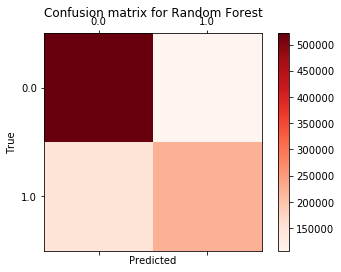

K-Nearest-Neighbors
Accuracy is 0.644345
Precision is 0.7780417093211529
Recall is 0.693247330254094


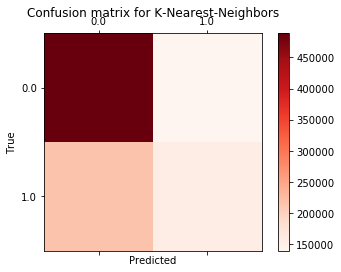

Logisitic Regression
Accuracy is 0.792745
Precision is 0.8338520861824938
Recall is 0.8357988401745164


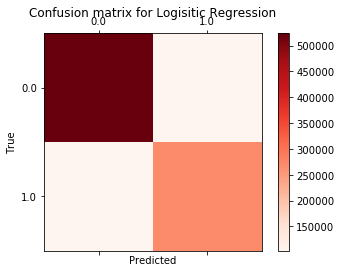

In [159]:
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

### Tunning RF Model

In [164]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'n_estimators':[10,20,30,40,50], "max_depth": [3,4,5,6], 
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_RF.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 377.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

In [166]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
print_grid_search_metrics(Grid_RF)

Best score: 0.653
Best parameters set:
	max_depth: 6
	n_estimators: 10


### Tunning KNN Model

In [ ]:
parameters = {
    'n_neighbors':[3,5,7,10]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X, y)
print_grid_search_metrics(Grid_KNN)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.656
Best parameters set:
	n_neighbors: 10


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 167.8min finished


### Tunning LR Model

In [ ]:
parameters = {
    'penalty':['l1', 'l2'], 
    'C':[1, 5, 10],
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X, y)
print_grid_search_metrics(Grid_LR)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
